# Preprocesamiento de los datos: Noticias falsas y Noticias reales

In [1]:
# Importar las librerías con el código desarrollado
import sys
import pathlib

In [2]:
# Obtener la ruta de las librerías personalizadas requeridas para cargar los datos
def get_directory():
    pathtest= pathlib.Path() 
    current_path = str(pathtest.parent.absolute())
    name_directory = "ProyectoUNAL"
    index_path = current_path.find(name_directory)
    path_data = current_path[:index_path+len(name_directory)]
    path_data += '\\scripts\\data_acquisition'
    return path_data

In [3]:
# Adcionar la ruta de las librerías  personalizadas requeridas para cargar los datos
path_source = get_directory()
sys.path.append(path_source)

In [4]:
# Librerías a usar en el proyecto
from download_data import get_data
import pandas as pd
import plotly.express as px
from statistics import mean

In [5]:
# Obtención de los archivos
news_true, news_false = get_data()

# **1. Preprocesamiento del archivo noticias reales**
De acuerdo con el análisis exploratorio de los datos las actividades a realizar de preprocesamiento de los datos son:
1. Eliminar el registro que no contiene información en el campo 'text', contenido de la noticia.

In [6]:
# Conteo del número de registros
news_true.count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

In [7]:
# Información del dataframe
news_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
# Cálculo de la extensión del título (title) y contenido (text) de las noticias reales
news_true['len_title'] = (news_true['title'].str.strip()).str.len()
news_true['len_text'] = (news_true['text'].str.strip()).str.len()

In [9]:
# Se muestran los registros con longitud 0 en el campo text
news_true_short = news_true[news_true['len_text'] == 0]

In [10]:
# solo un registro con longitud 0
news_true_short 

,title,text,subject,date,len_title,len_text
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016",30,0


In [11]:
# Se crea un nuevo dataframe eliminando el registro sin información en el campo text
news_true_mod = news_true[news_true['len_text'] > 0]

In [12]:
# Función de preprocesamiento de las noticias reales
def preprocessing_true(df):
    # Cálculo de la extensión del contenido (text) de las noticias reales
    df['len_text'] = (df['text'].str.strip()).str.len()
    # Se crea un nuevo dataframe eliminando el registro sin información en el campo text
    new_mod = df[df['len_text'] > 0]
    new_df = new_mod[['title', 'text','subject']]
    new_df['type'] = 1
    return new_df

# **2. Preprocesamiento del archivo noticias falsas**
De acuerdo con el análisis exploratorio de los datos las actividades a realizar de preprocesamiento de los datos son:
1. Eliminar los 630 registros sin contenido en el texto de la noticia.
2. Eliminar los 211 registros cuyo tamaño del contenido es muy corto inferior o igual a 50 caracteres.

In [13]:
# Conteo del número de registros
news_false.count()

title      23481
text       23481
subject    23481
date       23481
dtype: int64

In [14]:
# Información del dataframe
news_false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [15]:
# Cálculo de la extensión del título (title) y contenido (text) de las noticias falsas
news_false['len_title'] = (news_false['title'].str.strip()).str.len()
news_false['len_text'] = (news_false['text'].str.strip()).str.len()

In [16]:
# Registros sin información en el campo texto
reg_sininfo = news_false[news_false['len_text'] == 0 ]
reg_sininfo.count()

title        630
text         630
subject      630
date         630
len_title    630
len_text     630
dtype: int64

In [17]:
# Se crea un nuevo dataframe eliminando los registros sin información en el campo text
news_false_mod = news_false[news_false['len_text'] > 0]

In [18]:
# Número de reistros en el dataframe de noticias falsa modificado
news_false_mod.count()

title        22851
text         22851
subject      22851
date         22851
len_title    22851
len_text     22851
dtype: int64

In [19]:
# Registros con muy pocos caracteres en el campo texto, analizando el nuevo dataframe modificado
size_limit = 50
reg_lowinfo = news_false_mod[news_false_mod['len_text'] <= size_limit ]
reg_lowinfo.count()

title        211
text         211
subject      211
date         211
len_title    211
len_text     211
dtype: int64

In [20]:
# Inspección de los registros cuyo tamaño del contenido es menor o igual a 50 caracteres
reg_lowinfo['text']

11117                                               Enjoy:
11251          https://www.youtube.com/watch?v=cJZFepSvxzM
11286          https://www.youtube.com/watch?v=-7Tn4gi_Os8
11315          https://www.youtube.com/watch?v=SH0pRtK9sAE
11316          https://www.youtube.com/watch?v=DRLVvYzG46w
                               ...                        
21209                     When karma bites ya  in the a*s 
21503                    My brothers DIED for that flag!  
21659    Here s a mom who knows how to raise her children 
21882                         You won t want to miss this 
21909    PRETTY FUNNY STUFF-MAKE SURE TO WATCH TO THE END.
Name: text, Length: 211, dtype: object

In [21]:
# Se crea un nuevo dataframe eliminando los registros cuto tamaño del campo text es inferior o igual al límite establecido
news_false_mod2 = news_false_mod[news_false_mod['len_text'] > size_limit]

In [22]:
# Número de reistros en el dataframe de noticias falsas modificado
news_false_mod2.count()

title        22640
text         22640
subject      22640
date         22640
len_title    22640
len_text     22640
dtype: int64

In [23]:
# Función de preprocesamiento de las noticias falsas
def preprocessing_false(df, size):
    # Cálculo de la extensión del contenido (text) de las noticias falsas
    df['len_text'] = (df['text'].str.strip()).str.len()
    # Se crea un nuevo dataframe eliminando los registros sin información en el campo text
    news_false_mod = df[df['len_text'] > 0]
    # Se crea un nuevo dataframe eliminando los registros cuyo tamaño del campo text es inferior o igual al límite establecido
    new_false_mod2 = news_false_mod[news_false_mod['len_text'] > size]
    new_df = new_false_mod2[['title', 'text','subject']]
    new_df['type'] = 0
    return new_df

In [24]:
# Generación del dataframe definitivo
df_new_true = preprocessing_true(news_true)
df_new_false = preprocessing_false(news_false, 50)

C:\Users\mk_ca\AppData\Local\Temp\ipykernel_26260\3569212037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['type'] = 1
C:\Users\mk_ca\AppData\Local\Temp\ipykernel_26260\624325761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['type'] = 0


In [25]:
# Función para crear un solo dataframe con todos los datos requeridos
def get_data_processed(news_true, news_false, size_content_false):
    df_true = preprocessing_true(news_true)
    df_false = preprocessing_false(news_false, size_content_false)
    dfs = [df_true, df_false]
    df_new = pd.concat(dfs)
    return df_new

In [26]:
# Prueba
df_total = get_data_processed(news_true, news_false, 50)
df_total.count()

C:\Users\mk_ca\AppData\Local\Temp\ipykernel_26260\3569212037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['type'] = 1
C:\Users\mk_ca\AppData\Local\Temp\ipykernel_26260\624325761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['type'] = 0


title      44056
text       44056
subject    44056
type       44056
dtype: int64

In [28]:
# Visualización aleatoria de 10 registros del dataframe total de noticias
df_total.sample(10)

,title,text,subject,type
13876,Beijing police detains teacher related to alle...,BEIJING (Reuters) - The police of Beijing s Ch...,worldnews,1
3186,Thin-Skinned Trump Whines About Election Resu...,It s been two months since the 2016 Election t...,News,0
19312,"TRASHY, AGING Pop-Star Madonna Uses Picture Of...",Madonna took to Instagram late Thursday to pro...,left-news,0
16354,BREAKING: STATE DEPARTMENT Asked FBI To Switch...,"In the documents, an unnamed person interviewe...",Government News,0
1162,U.S. bill to regulate internet ads gains bipar...,(Reuters) - U.S. legislation that would impose...,politicsNews,1
14165,WITCH HUNT: COMMUNIST CALIFORNIA Raids Home Of...,"Make no mistake about it, we are seeing tactic...",politics,0
13439,Trump angers UK with truculent tweet to May af...,LONDON (Reuters) - U.S. President Donald Trump...,worldnews,1
10082,"WATCH: TRUMP’S BI-RACIAL, FORMER GIRLFRIEND Of...","Kara Young, the biracial model who dated Donal...",politics,0
5206,Tammy Duckworth Just Put Trump In His Place O...,"Earlier on Tuesday, Donald Trump decided to ac...",News,0
13475,CRAZY VIDEO: Anarchist Tries To Burn American ...,A protester at the RNC in Cleveland attempted ...,politics,0


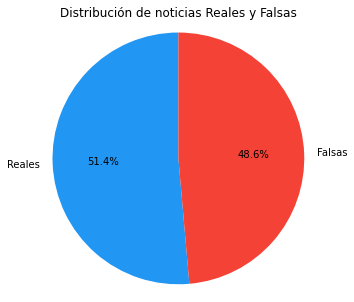

In [32]:
# Distribución del número de nocicias reales y falsas después del procesamiento
# Archivos originales
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
labels = 'Reales', 'Falsas'
counts = df_total['type'].value_counts().values
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#2196f3', '#f44336' ])
plt.axis('equal')
plt.title("Distribución de noticias Reales y Falsas")
plt.show()